# Section 1 - Data Gathering

Given this table: create table page_table(visitor_id int, visit_date date, page_name varchar(100))
  
  ### 1.1 How would you look at 10 sample rows in this table?
  
  SELECT visitor_id, visit_date, page_name
  
  FROM page_table
  
  LIMIT 10;
  
  ### 1.2 How would you look at visitors who saw the ‘home page’ or the ‘checkout page’?
  
  SELECT DISTINCT visitor_id
  
  FROM page_table
  
  WHERE page_name in ('home page', 'checkout page');
  
  ### 1.3 Get a list of 100 visitors who saw the most pages
  
  SELECT visitor_id, COUNT(DISTINCT page_name)
  
  FROM page_table
  
  GROUP BY visitor_id
  
  ORDER BY COUNT(DISTINCT page_name) DESC
  
  LIMIT 100;
  

# SECTION 2 - DATA PROCESSING / ANALYSIS

In [38]:
# Let's download and unzip the files
!rm *csv *zip*
!wget https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/weekly_sales/weekly_sales.zip
!unzip -o weekly_sales.zip
!ls -ltr

--2018-03-06 21:06:49--  https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/weekly_sales/weekly_sales.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.164.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.164.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872049 (852K) [application/zip]
Saving to: ‘weekly_sales.zip’

weekly_sales.zip    100%[===================>] 851.61K   805KB/s    in 1.1s    

2018-03-06 21:06:50 (805 KB/s) - ‘weekly_sales.zip’ saved [872049/872049]

Archive:  weekly_sales.zip
  inflating: sales_week_starting_2012-10-01.csv  
  inflating: __MACOSX/._sales_week_starting_2012-10-01.csv  
  inflating: sales_week_starting_2012-10-08.csv  
  inflating: __MACOSX/._sales_week_starting_2012-10-08.csv  
  inflating: sales_week_starting_2012-10-15.csv  
  inflating: __MACOSX/._sales_week_starting_2012-10-15.csv  
  inflating: sales_week_starting_2012-10-22.csv  
  inflating: __MACOSX/._sales_week_star

In [39]:
# Take a peek at one of the csv files
!head sales_week_starting_2012-10-01.csv

sale_time,purchaser_gender
2012-10-01 01:42:22,female
2012-10-01 02:24:53,female
2012-10-01 02:25:40,female
2012-10-01 02:30:42,female
2012-10-01 02:51:32,male
2012-10-01 03:03:00,female
2012-10-01 03:09:10,female
2012-10-01 03:09:40,male
2012-10-01 03:16:08,female


In [40]:
'''
Try to read the files and create a big dataframe for them
'''
import glob
import pandas as pd

# get data file names
allFiles = glob.glob("sales*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in sorted(allFiles):
    print(file_)
    df = pd.read_csv(file_,index_col="sale_time", header=0, parse_dates=[0])
    #print(df.count())
    list_.append(df)
frame = pd.concat(list_)
print(frame.count())

sales_week_starting_2012-10-01.csv
sales_week_starting_2012-10-08.csv
sales_week_starting_2012-10-15.csv
sales_week_starting_2012-10-22.csv
sales_week_starting_2012-10-29.csv
sales_week_starting_2012-11-05.csv
sales_week_starting_2012-11-12.csv
sales_week_starting_2012-11-19.csv
sales_week_starting_2012-11-26.csv
sales_week_starting_2012-12-03.csv
sales_week_starting_2012-12-10.csv
sales_week_starting_2012-12-17.csv
sales_week_starting_2012-12-24.csv
sales_week_starting_2012-12-31.csv
sales_week_starting_2013-01-07.csv
sales_week_starting_2013-01-14.csv
sales_week_starting_2013-01-21.csv
sales_week_starting_2013-01-28.csv
sales_week_starting_2013-02-04.csv
sales_week_starting_2013-02-11.csv
sales_week_starting_2013-02-18.csv
sales_week_starting_2013-02-25.csv
sales_week_starting_2013-03-04.csv
sales_week_starting_2013-03-11.csv
sales_week_starting_2013-03-18.csv
sales_week_starting_2013-03-25.csv
sales_week_starting_2013-04-01.csv
sales_week_starting_2013-04-08.csv
sales_week_starting_

In [41]:
# Look at the first few rows
frame.head()

,purchaser_gender
sale_time,
2012-10-01 01:42:22,female
2012-10-01 02:24:53,female
2012-10-01 02:25:40,female
2012-10-01 02:30:42,female
2012-10-01 02:51:32,male


In [42]:
# Look at the last few rows to make sure the dates look correct
frame.tail()

,purchaser_gender
sale_time,
2013-09-15 23:30:51,female
2013-09-15 23:42:02,female
2013-09-15 23:43:24,male
2013-09-15 23:43:32,male
2013-09-15 23:48:47,male


In [43]:
frame.describe()

,purchaser_gender
count,204329
unique,2
top,female
freq,107740


In [44]:
# Check for null values
frame.isna().any()

purchaser_gender    False
dtype: bool

In [45]:
# Create date column to be used for the next question
df = frame.copy()
df['date'] = df.index.date
df.head()

,purchaser_gender,date
sale_time,,
2012-10-01 01:42:22,female,2012-10-01
2012-10-01 02:24:53,female,2012-10-01
2012-10-01 02:25:40,female,2012-10-01
2012-10-01 02:30:42,female,2012-10-01
2012-10-01 02:51:32,male,2012-10-01


### 2.1 Plot the number of daily sales for all 50 weeks

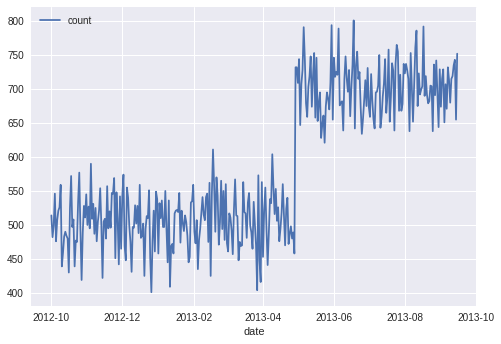

In [46]:
daily = df.groupby('date').count()
daily.columns = ['count']
daily.plot()

### 2.2 It looks like there has been a sudden change in daily sales. On what date was that sudden change?

It looks like some time in 2013-05 has a sudden change/increase in daily sales. Let's dive into details of the data between 2013/04/15 and 2013/05/15 to find the exact date when it happened

In [47]:
from datetime import datetime
def to_date(s):
  return datetime.strptime(s, '%Y%m%d').date()
  
daily[(daily.index >  to_date('20130415')) & (daily.index <  to_date('20130515'))]

,count
date,
2013-04-16,494
2013-04-17,518
2013-04-18,560
2013-04-19,516
2013-04-20,470
2013-04-21,524
2013-04-22,540
2013-04-23,472
2013-04-24,487


The data shows that 2013-04-29 is when the sudden increase in sales happened!

### 2.3 Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value? How would you describe this statistical significance to a non-technical individual?

In a two-sample t-test, the null hypothesis is that the means of both groups are the same. I will this to test the hypothesis:


In [48]:
# Create 2 datasets: before and after change
before_change = daily[daily.index < to_date('20130429')]
after_change = daily[daily.index >= to_date('20130429')]
print(before_change.describe() )
print(after_change.describe() )

            count
count  210.000000
mean   504.400000
std     40.001579
min    401.000000
25%    477.000000
50%    504.500000
75%    533.750000
max    611.000000
            count
count  140.000000
mean   702.892857
std     39.324640
min    621.000000
25%    674.000000
50%    704.500000
75%    731.250000
max    801.000000


In [49]:
'''
Run 2-sample t-test to compare the 2 datasets
'''
import scipy.stats as stats
stats.ttest_ind(a= before_change,
                b= after_change,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=array([-45.94353319]), pvalue=array([3.48724685e-138]))

p-value is significant low (3.48724685e-138 ~ 0) so we can reject null hypothesis that the means of the both groups are the same. In other words, the change/increase in daily sales is statistically significant.

An explanation of statistical significance to non-technical individual: when we believe something is statistically significant we believe the difference is larger than can reasonably be explained as a chance occurrence.
### 2.4 - Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [50]:
female_df = df[df.purchaser_gender == 'female'].groupby('date').count()
female_df.columns = ['female_count']
male_df = df[df.purchaser_gender == 'male'].groupby('date').count()
male_df.columns = ['male_count']

female_df.head()

,female_count
date,
2012-10-01,413
2012-10-02,379
2012-10-03,386
2012-10-04,432
2012-10-05,368


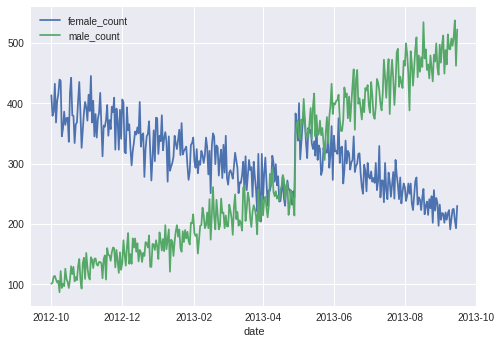

In [51]:
female_df.join(male_df).plot()

The plot is showing that the change in daily sales is due to a shift in the proportion of male-vs-female customers. Specifically, male customers started to be much less than females have purchased (male:female = 1:4) back in 2012 but gradually increased since then and finally surpased around May/2013 and continued to move upward while female purchasers continued to go down.
### 2.5 - Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?

In [0]:
def to_time(s):
  return datetime.strptime(s, '%I:%M%p').time()

def time2daypart(t):
  if to_time('12:00AM') <= t <= to_time('6:00AM'):
    return 'night'
  elif (to_time('6:00AM') < t <= to_time('12:00PM')):
    return 'morning'  
  elif (to_time('12:00PM') < t <= to_time('6:00PM')):
    return 'afternoon'
  else: 
    return 'evening'

df2 = frame.copy()
df2['time'] = df2.index.time
df2['dayparts'] = df2['time'].map(time2daypart)

In [53]:
# Find the percentage of sales for each daypart over all 50 weeks
df2.groupby('dayparts').count()['time'] * 100./ len(df2)


dayparts
afternoon    39.412418
evening      20.857049
morning      30.770473
night         8.960060
Name: time, dtype: float64

# SECTION 3 - MACHINE LEARNING (QUALITATIVE ANALYSIS)

### 3.1 - Describe how you would go about evaluating this data and how you would build a product recommendation engine. Do NOT actually build the recommendation engine, rather just describe how you would build it.

To evaluate this data, let's load the data and see what it looks like


In [54]:
# Let's download the csv
!wget https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/ml/SampleData_FlowerShop_Transactions_Table.csv

--2018-03-06 21:07:15--  https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/ml/SampleData_FlowerShop_Transactions_Table.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17747953 (17M) [application/x-www-form-urlencoded]
Saving to: ‘SampleData_FlowerShop_Transactions_Table.csv’

SampleData_FlowerSh 100%[===================>]  16.92M  5.43MB/s    in 3.1s    

2018-03-06 21:07:18 (5.43 MB/s) - ‘SampleData_FlowerShop_Transactions_Table.csv’ saved [17747953/17747953]



In [0]:
#Load csv to dataframe
df = pd.read_csv('SampleData_FlowerShop_Transactions_Table.csv',header=0 )#,index_col="sale_time", header=0, parse_dates=[0])

In [72]:
# High-level look at statistics to see if there is anything unusual
df.describe()

,customer_id,transaction_id,total_sale_amount_usd,cost_of_sale,sku_quantity
count,385013.000000,3.850130e+05,3.850130e+05,3.850130e+05,385013.000000
mean,4997.230969,9.452573e+05,8.134100e+03,2.571442e+03,161.375003
std,2889.498474,2.778214e+05,1.070741e+05,4.083110e+04,1632.450990
min,1.000000,4.640300e+05,-3.312632e+04,-1.382760e+04,1.000000
25%,2495.000000,7.045830e+05,1.900000e+00,6.000000e-01,1.000000
50%,4995.000000,9.450410e+05,4.011000e+01,1.180000e+01,2.000000
75%,7502.000000,1.185831e+06,6.526300e+02,2.064000e+02,16.000000
max,10000.000000,1.426667e+06,6.915119e+06,3.104436e+06,169934.000000


In [73]:
df.count()

customer_id              385013
transaction_id           385013
product_type             385013
vendor                   385013
total_sale_amount_usd    385013
cost_of_sale             385013
sku_quantity             385013
dtype: int64

In [74]:
# Calculate adjusted_sale = total_sale_amount_usd - cost_of_sale
df['adjusted_sale'] = df['total_sale_amount_usd'] - df['cost_of_sale']
df.head()

,customer_id,transaction_id,product_type,vendor,total_sale_amount_usd,cost_of_sale,sku_quantity,adjusted_sale
0,7639,464030,DOZEN ROSES,Supplier B,321.32,190.4,9,130.92
1,7615,464032,DOZEN ROSES,Supplier B,77.60,21.4,3,56.20
2,5654,464036,ANTHURIUM,Supplier B,484.55,214.2,1,270.35
3,8069,464038,DAFFODILS,OTHERS,7.52,0.4,1,7.12
4,9243,464040,ANTHURIUM,Supplier B,48.36,29.0,3,19.36


In [75]:
# Let's look at time series of the adjusted sales using plot
df2 = df.pivot(index='transaction_id', columns='product_type', values='adjusted_sale')
df2.describe()

product_type,ANTHURIUM,CYMBIDIUM,DAFFODILS,DAISIES,DHALIA,DOZEN ROSES,FREESIAS,FUJIS,GARDENIA,GERBERA,...,HYDRANGEA,LEPTOSPERMUM,LILLIES,OMITHOALUM,ORCHIDS,OTHERS,ROSE SPRAY,SNAPDRAGON,SUNFLOWER,WAXFLOWER
count,1.181260e+05,4610.000000,3.176100e+04,20081.000000,3.747100e+04,1.152790e+05,8464.000000,5617.000000,1261.000000,403.000000,...,775.000000,1735.000000,18408.000000,981.000000,9382.000000,4523.000000,1327.000000,2108.000000,1431.000000,1258.000000
mean,4.521224e+03,9261.519857,3.858235e+03,2084.028296,2.573064e+04,3.299564e+03,510.654080,269.129502,331.026154,376.205757,...,379.439561,480.105787,332.903976,1675.320102,2513.483650,1782.699076,2753.438561,116.693515,2903.424801,803.631892
std,4.394599e+04,43488.043686,4.453052e+04,9807.751171,2.001170e+05,2.387491e+04,3994.117313,819.513376,1568.896804,1651.443427,...,2339.113480,2377.470156,1962.988306,8091.073420,19921.512874,12961.426435,8164.274643,392.799219,11922.816356,5705.824025
min,-8.898050e+03,-397.220000,-7.678570e+03,-1489.680000,-1.929872e+04,-5.741180e+03,-495.070000,-8.620000,-1226.310000,-55.770000,...,-925.130000,-215.280000,-169.030000,-439.010000,-2156.420000,-2680.930000,-261.980000,-43.560000,-453.440000,-1.700000
25%,1.980000e+00,3.482500,9.000000e-01,4.150000,8.400000e-01,2.080000e+00,0.320000,1.120000,1.210000,0.060000,...,0.295000,1.255000,0.190000,0.180000,0.620000,0.030000,10.965000,0.735000,2.190000,0.030000
50%,4.354500e+01,43.185000,5.810000e+00,135.180000,2.023000e+01,4.923000e+01,2.810000,16.600000,15.700000,0.370000,...,3.100000,10.730000,1.390000,1.330000,11.265000,2.780000,233.270000,8.870000,57.590000,0.925000
75%,5.708800e+02,723.067500,4.665000e+01,791.690000,9.175150e+02,5.497400e+02,28.350000,121.060000,129.550000,2.580000,...,17.655000,134.265000,13.670000,5.710000,156.427500,77.425000,1006.330000,64.277500,615.915000,17.937500
max,3.615955e+06,488554.820000,1.730167e+06,261566.990000,3.810683e+06,1.128854e+06,78043.280000,11149.210000,36802.360000,14580.930000,...,31384.980000,25134.300000,33137.470000,64192.420000,401416.530000,181429.810000,58611.130000,4352.700000,95219.280000,88167.490000


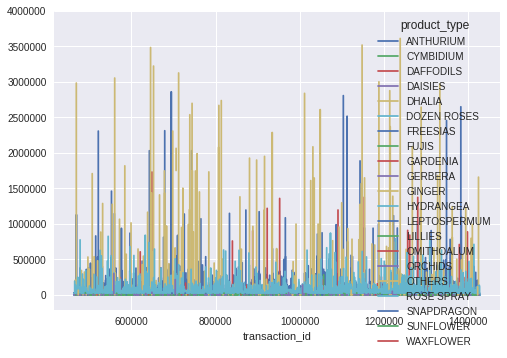

In [76]:
df2.plot()

The plot shows that Dhalia is the most profitable item, next is Anthurium. Let's double-check with the data

In [77]:
# total sales of products, sor
import numpy as np
df.groupby('product_type').agg({'adjusted_sale':np.sum}).sort_values('adjusted_sale', ascending=False)

,adjusted_sale
product_type,
DHALIA,9.641530e+08
ANTHURIUM,5.340741e+08
DOZEN ROSES,3.803705e+08
DAFFODILS,1.225414e+08
CYMBIDIUM,4.269561e+07
DAISIES,4.184937e+07
ORCHIDS,2.358150e+07
OTHERS,8.063148e+06
LILLIES,6.128096e+06


Indeed, the 3 top sellers are Dhalia, Anthurium and Dozen Roses. Ginger is the bottom of the list which is barely profitable

#### Now let's look from vendor's perspective:

In [79]:
df.groupby('vendor').agg({'adjusted_sale':np.sum}).sort_values('adjusted_sale', ascending=False)

,adjusted_sale
vendor,
Supplier B,1.286240e+09
Supplier A,5.847566e+08
Supplier C,2.189188e+08
Supplier D,3.627076e+07
OTHERS,1.550933e+07


Supplier B is definitely the one that is most profitable.

#### From customer's perspective:
Here are the top 5:

In [81]:
df.groupby('customer_id').agg({'adjusted_sale':np.sum}).sort_values('adjusted_sale', ascending=False).head()

,adjusted_sale
customer_id,
210,4332172.39
2979,4288797.70
2665,4187782.15
2716,4048931.97
2380,3974081.14


#### Build a product recommendation engine
I would use filtering to build product recommendation engine. The 2 approaches include:

* Content-based: A popular, recommended product has similar attributes to what the user views or likes. In this case, I try to find look alike items (in this case, flowers) and recommend them. Information/features of flowers can be color, stem length, family (bulb, orchid, etc.), fragrance, pedal length, pedal width, season, etc. Based on these information we can find look-alike (related) of these flowers. We simply use these look-alikes to recommend for the original choice of flowers.

* Collaborative (user-based): Other users, who like the same products the user views or likes, also liked a recommended product. The recommendation engine can rely on likes and desires of other users in order to compute a similarity index between users and recommend items to them accordingly. For example, user A and user B both rate highly Dhalia and Lillies. B also likes Cymbidium and Daffodils so these can also be recommended to A. To implement this, we build User/Item matrix where each cell has the rating of what users have on particular items/flowers. To measure similarity, we can use cosine similarity or correlations between vectors of users/items.

I can also combine both filtering types in order to build a more prosperous and sophisticated recommendation engine to enrich user experience.

# SECTION 4 - VISUALIZATION & BASIC DATA MANIPULATION

In [62]:
!wget https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/org/org_data.csv

--2018-03-06 21:07:38--  https://s3.amazonaws.com/retina-public-datasets/data-scientist-assignment/org/org_data.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.82.139
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.82.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4416 (4.3K) [text/csv]
Saving to: ‘org_data.csv’

org_data.csv        100%[===================>]   4.31K  --.-KB/s    in 0s      

2018-03-06 21:07:39 (119 MB/s) - ‘org_data.csv’ saved [4416/4416]



In [63]:
import pandas as pd
import numpy as np
df = pd.read_csv('org_data.csv',header=0, dtype={'employee_id': np.int, 'manager_employee_id': np.int} )#,index_col="sale_time", header=0, parse_dates=[0])
df.head()


,employee_id,manager_employee_id,employee_name
0,310675,750317498,Elisha Bentley
1,1201346,666716720,Tomas Atkinson
2,1227778,100001000000000,Kianna Benson
3,1602606,1018684196,Scarlett Stanley
4,2901687,750317498,Danica Clarke


### 4.1 - Who is the head of this organization?
To answer this question, we want to query on managers who are not employees:

In [64]:
df[~df.manager_employee_id.isin(df.employee_id)]

,employee_id,manager_employee_id,employee_name
92,828754905,872485186,Giancarlo Avila


### 4.2 - What is the average and median manager to employee ratio?

In [65]:
df2 = df[['manager_employee_id', 'employee_id']].groupby('manager_employee_id').count()
df2.rename(columns = {'employee_id': 'employee_count'}, inplace=True)
df2.mean()

employee_count    3.527778
dtype: float64

In [66]:
df2.median()

employee_count    2.0
dtype: float64

1 manager has average of 3.53 employees and median of 2 employees

### 4.3 - What is the maximum depth of the organization?



In [67]:
max_depth = 0
def findMaxDepth(df, manager_id, current_depth):
    employees = df[df.manager_employee_id == manager_id].employee_id
    emp_max_depth = []
    if (employees.empty):
        return current_depth
    for employee in employees:
        #print(employee, current_depth + 1)
        emp_max_depth += [findMaxDepth(df, employee, current_depth + 1)]
    #print(emp_max_depth)
    return max(emp_max_depth)
    
findMaxDepth(df, 872485186, 0)


6

### 4.4 - Draw a visual plot of the organizational chart.

In [68]:
#!apt-get install graphviz -y
!pip install pydot

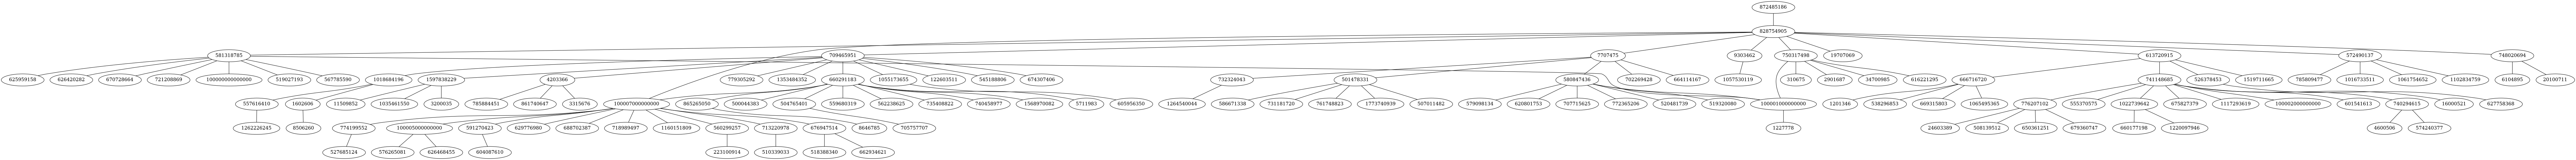

In [70]:
from IPython.display import Image
import pydot

graph = pydot.Dot(graph_type='graph')

# Use df to create edges
for _, row in df.iterrows():
  edge = pydot.Edge(row['manager_employee_id'], row['employee_id'])
  graph.add_edge(edge)


Image(graph.create_png(), width=5000)
